In [3]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, Input
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from pathlib import Path
import cv2
from keras import backend as K
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [39]:
import numpy as np

In [5]:
pneumonia = 'C:/Users/abhi8/Downloads/archive (7)/chest_xray/train/PNEUMONIA'
normal = 'C:/Users/abhi8/Downloads/archive (7)/chest_xray/train/NORMAL'
pneumonia1 = Path(pneumonia)
normal1 = Path(normal)

pneumonia_name = pneumonia1.glob('*.jpeg') #listing all the images names from pneumonia class
normal_name = normal1.glob('*.jpeg') #listing all the images names from non-pneumonia class

training_data = [] #Empty list to combine

for img in pneumonia_name:
    training_data.append((img, 0))
for img in normal_name:
    training_data.append((img, 1))

In [6]:
df = pd.DataFrame(training_data, columns = ['image_name', 'label'], index = None)
df.head()

,image_name,label
0,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,0
1,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,0
2,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,0
3,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,0
4,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,0


In [7]:
df.tail()

,image_name,label
5211,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,1
5212,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,1
5213,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,1
5214,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,1
5215,C:\Users\abhi8\Downloads\archive (7)\chest_xra...,1


In [8]:
df['label'].value_counts()

0    3875
1    1341
Name: label, dtype: int64

Text(0, 0.5, 'Pnuemoina VS normal')

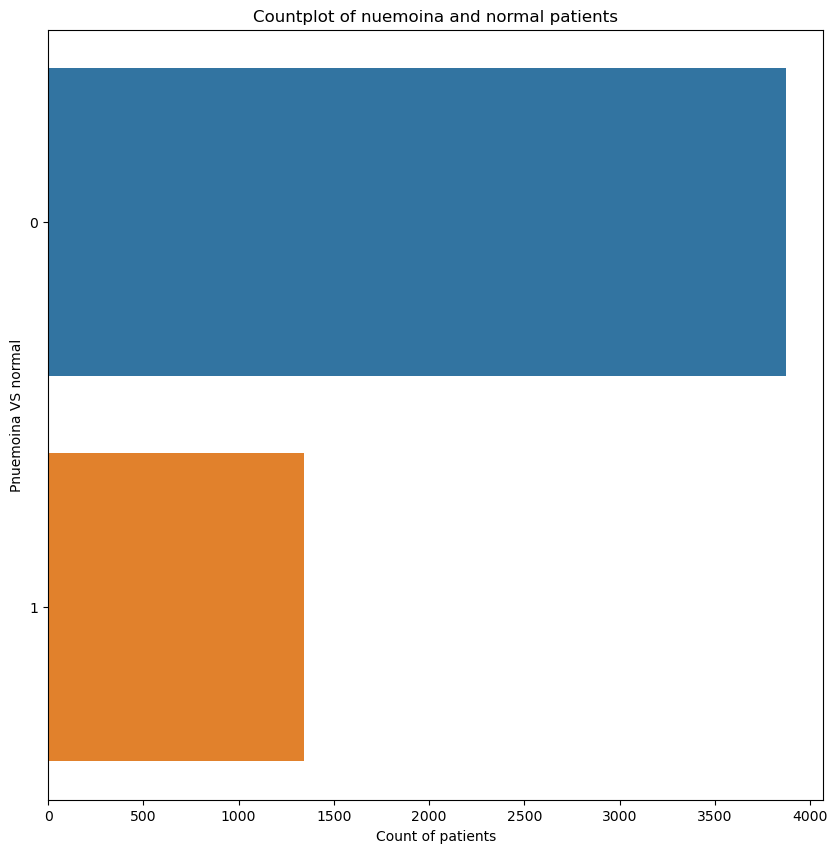

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(y = 'label', data =df)
plt.title('Countplot of nuemoina and normal patients')
plt.xlabel('Count of patients')
plt.ylabel('Pnuemoina VS normal')

In [10]:
pneumonia_data = df[df['label'] == 0]['image_name'].iloc[:10].tolist()
normal_data = df[df['label'] == 1]['image_name'].iloc[:10].tolist()

Text(0.5, 1.0, 'Normal')

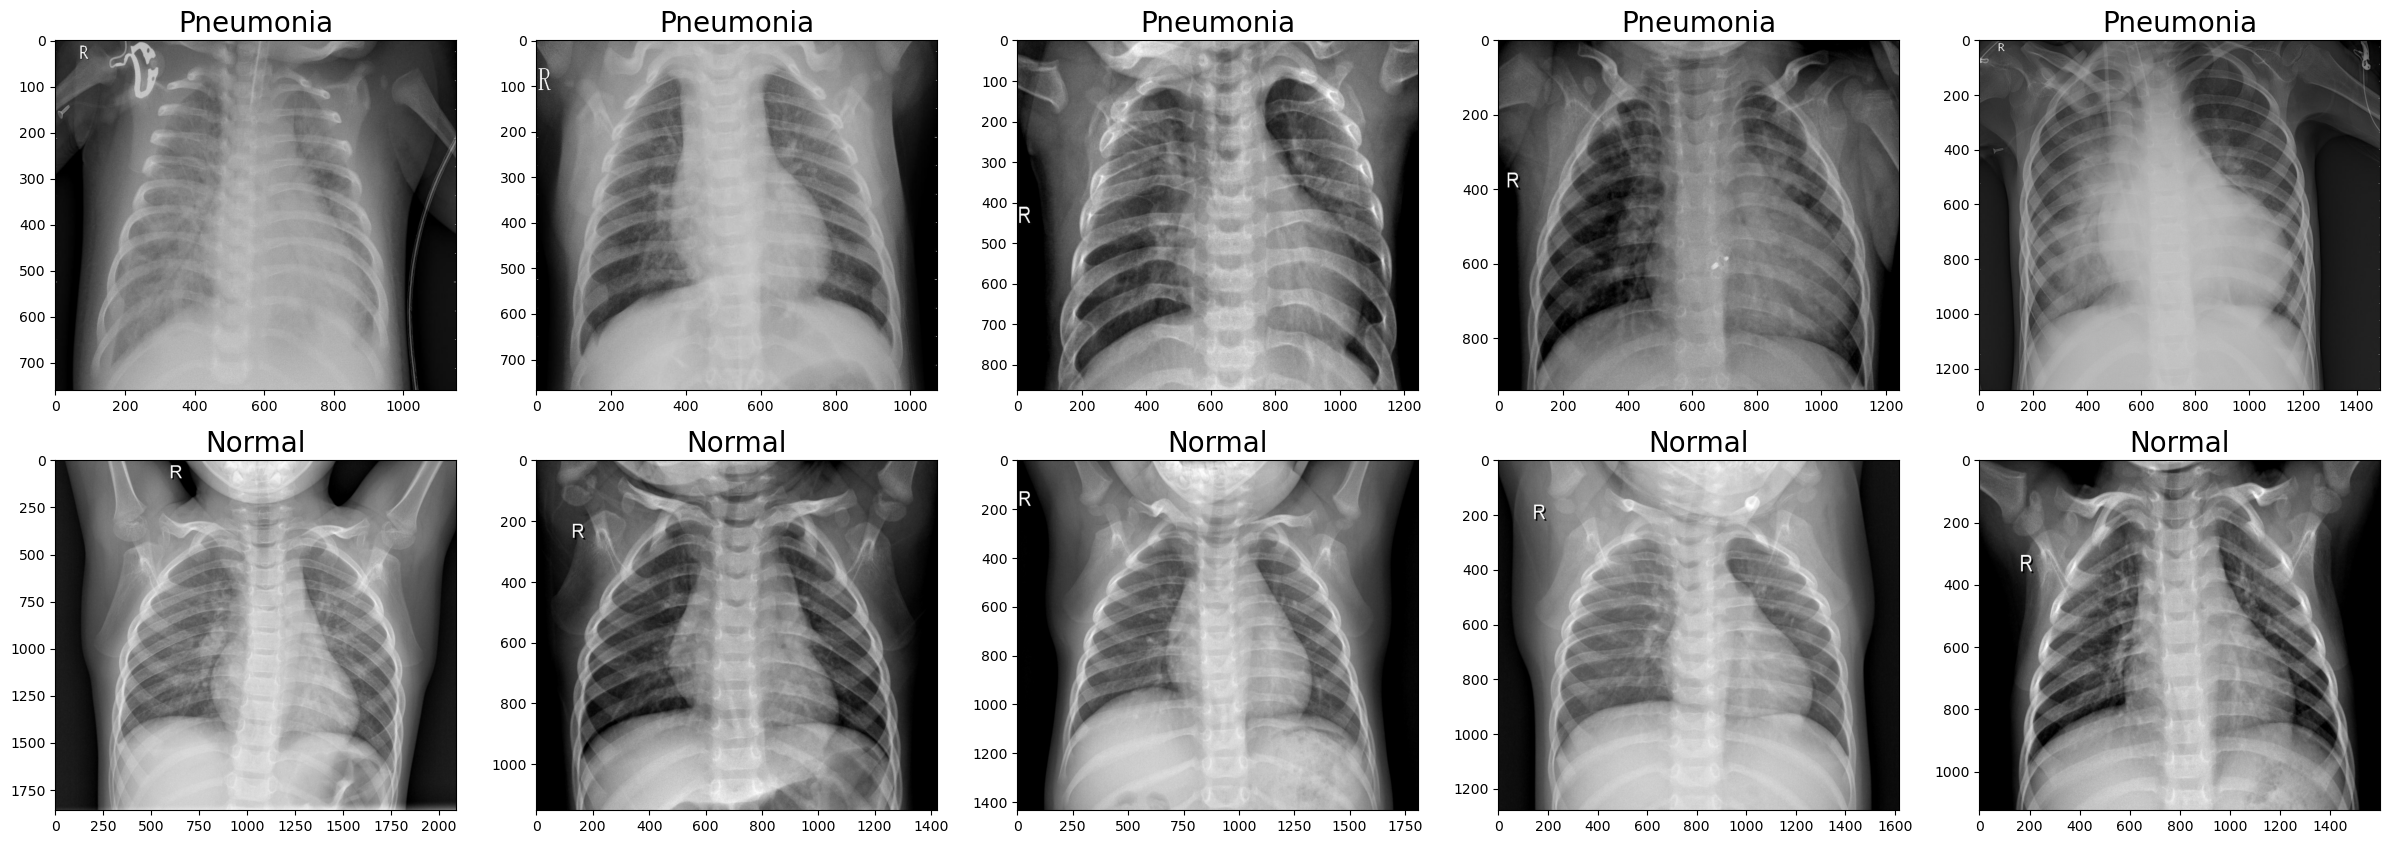

In [11]:
fig = plt.figure(figsize = (30, 10))
plt.subplot(2,5,1)
image = cv2.imread(str(pneumonia_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(pneumonia_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(pneumonia_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(pneumonia_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(pneumonia_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(normal_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(normal_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(normal_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(normal_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(normal_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

Text(0.5, 1.0, 'Normal')

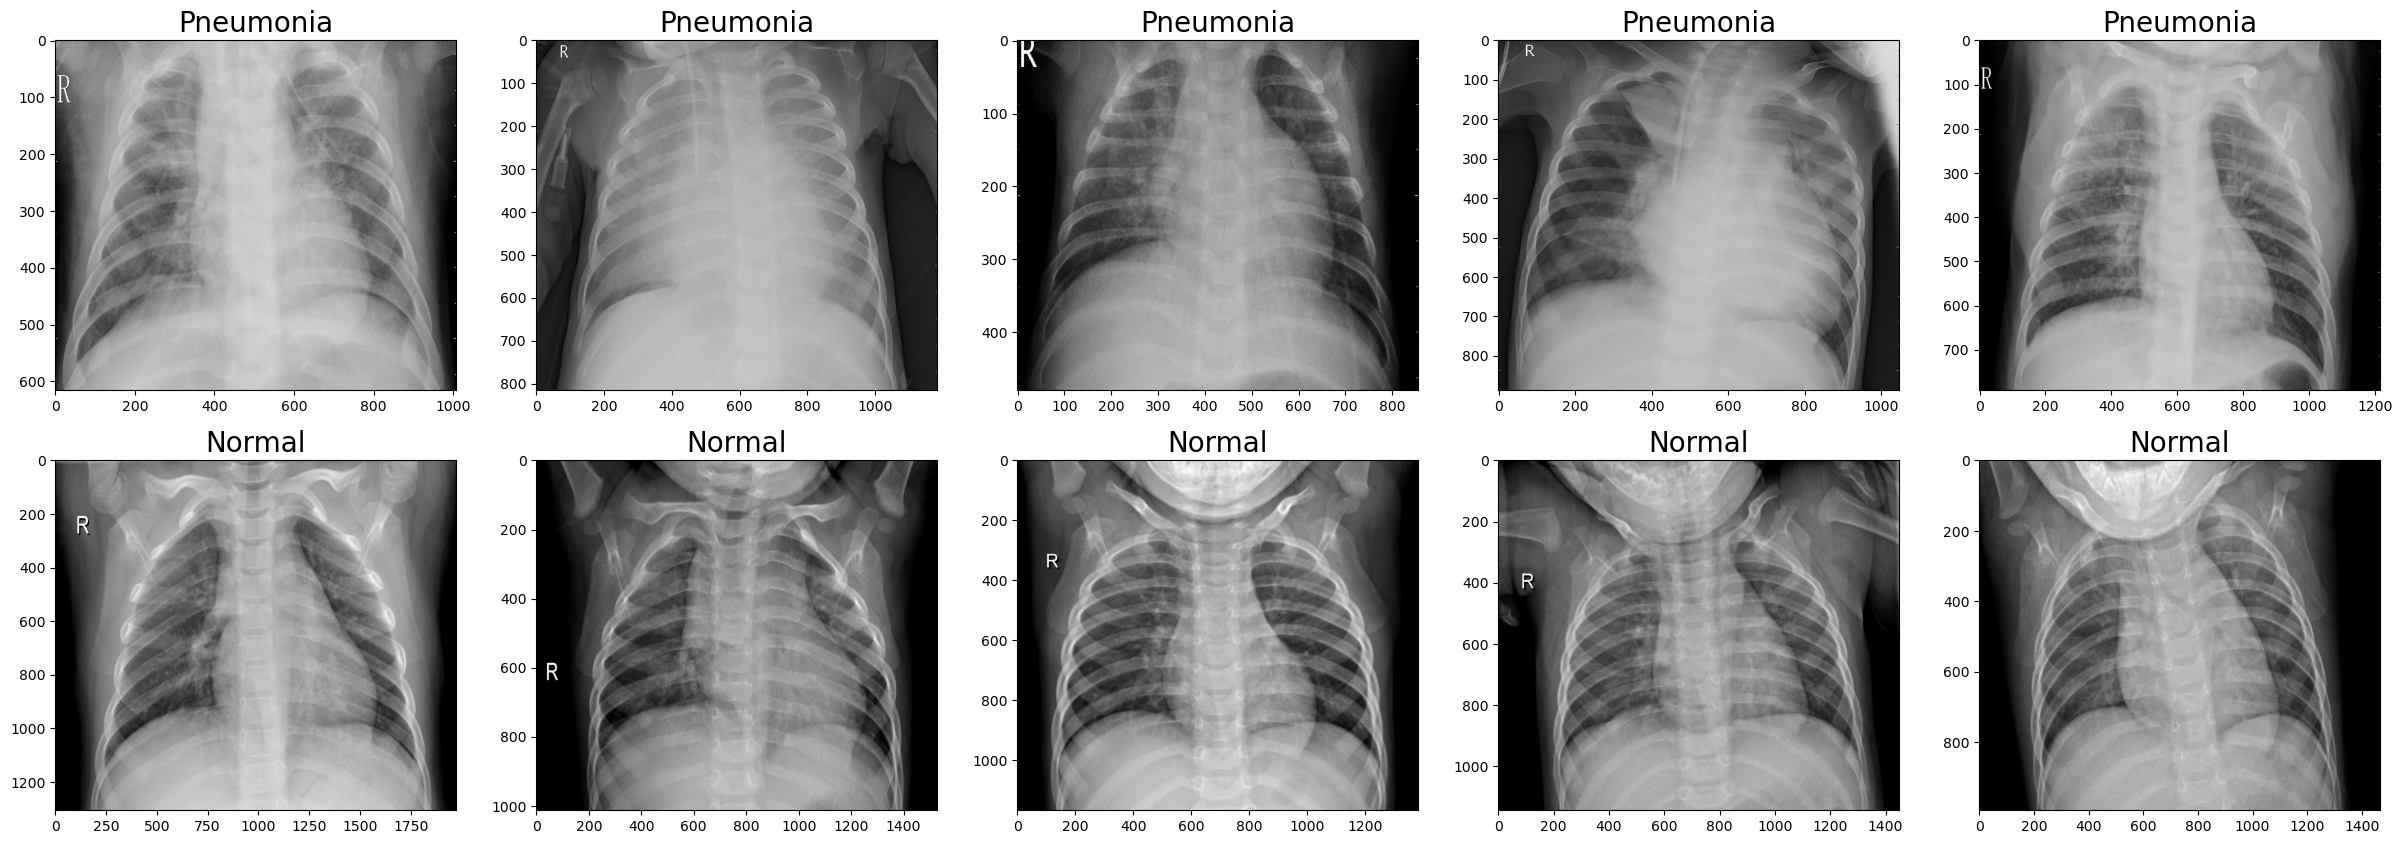

In [12]:
fig = plt.figure(figsize = (30, 10))
plt.subplot(2,5,1)
image = cv2.imread(str(pneumonia_data[5]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(pneumonia_data[6]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(pneumonia_data[7]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(pneumonia_data[8]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(pneumonia_data[9]))
plt.imshow(image, aspect="auto")
plt.title('Pneumonia', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(normal_data[5]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(normal_data[6]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(normal_data[7]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(normal_data[8]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(normal_data[9]))
plt.imshow(image, aspect="auto")
plt.title('Normal', fontsize = 20)

In [20]:
img_height, img_width = 256, 256
epochs = 10
batch_size = 32
train_dir ='C:/Users/abhi8/Downloads/archive (7)/chest_xray/train'
validation_dir = 'C:/Users/abhi8/Downloads/archive (7)/chest_xray/val'
test_dir = 'C:/Users/abhi8/Downloads/archive (7)/chest_xray/test'
nb_train_samples = 5216
nb_validation_samples = 16

In [21]:
if K.image_data_format() == 'channel_first':
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

In [22]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))

# Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(Dense(2, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 6)       456       
                                                                 
 average_pooling2d_2 (Averag  (None, 255, 255, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 251, 251, 16)      2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 125, 125, 16)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 121, 121, 120)     48120     
                                                                 
 flatten_1 (Flatten)         (None, 1756920)          

In [24]:
model.compile(optimizer =Adam(lr = 0.001, decay = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [25]:
train_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(img_width, img_height),
                batch_size=batch_size,
                class_mode='categorical')


Found 5216 images belonging to 2 classes.


In [27]:
for data, labels in train_generator:
    print(data.shape)
    print(labels.shape)
    print(labels)
    break

(32, 256, 256, 3)
(32, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [28]:
validation_generator = train_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(img_width, img_height),
                    batch_size=batch_size,
                    class_mode='categorical')

Found 16 images belonging to 2 classes.


In [29]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(img_width, img_height),
                    batch_size=1,
                    shuffle = False,
                    class_mode='categorical')

Found 624 images belonging to 2 classes.


In [30]:
print(test_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [31]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                       verbose = 1,
                       mode = 'auto',
                       save_best_only = True,
                       monitor='val_loss')

In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=[checkpointer])

Epoch 1/10
163/163 [==============================] - 812s 5s/step - loss: 1.7101 - accuracy: 0.4883
Epoch 2/10
163/163 [==============================] - 773s 5s/step - loss: 0.5703 - accuracy: 0.7429
Epoch 3/10
163/163 [==============================] - 850s 5s/step - loss: 0.5701 - accuracy: 0.7429
Epoch 4/10
163/163 [==============================] - 820s 5s/step - loss: 0.5709 - accuracy: 0.7429
Epoch 5/10
163/163 [==============================] - 781s 5s/step - loss: 0.5707 - accuracy: 0.7429
Epoch 6/10
163/163 [==============================] - 788s 5s/step - loss: 0.5712 - accuracy: 0.7429
Epoch 7/10
163/163 [==============================] - 781s 5s/step - loss: 0.5710 - accuracy: 0.7429
Epoch 8/10
163/163 [==============================] - 848s 5s/step - loss: 0.5710 - accuracy: 0.7429
Epoch 9/10
163/163 [==============================] - 930s 6s/step - loss: 0.5708 - accuracy: 0.7429
Epoch 10/10
163/163 [==============================] - 978s 6s/step - loss: 0.5708 - accura

In [33]:
    history.history.keys()

dict_keys(['loss', 'accuracy'])

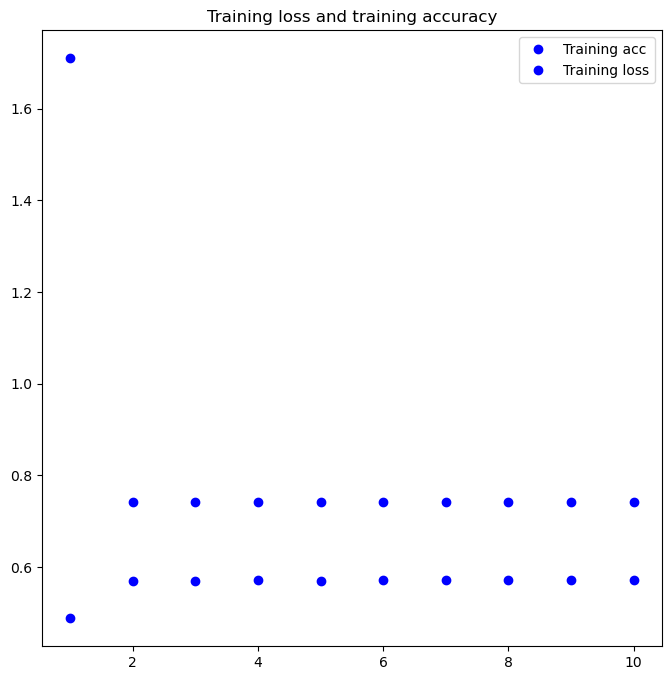

In [34]:
acc = history.history['accuracy']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training loss and training accuracy')
plt.legend()

In [35]:
scores = model.evaluate_generator(test_generator, steps = 624)

In [36]:
print("Loss on Test Data is", scores[0])
print("Accuracy on Test Data is", scores[1] * 100,"%")

Loss on Test Data is 0.6992999911308289
Accuracy on Test Data is 62.5 %
